## Name: Saikumar Karnakanti

## Course: Advanced Big Data and Data Mining (MSCS-634-B01)

## Lab 3: Clustering Analysis Using K-Means and K-Medoids Algorithms

### Step 1: Load and Prepare the Dataset

In [1]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

X.describe()
pd.Series(y).value_counts()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


The Wine dataset contains 178 samples with 13 numerical attributes describing different chemical properties of wines from three cultivars. Since the features vary greatly in scale, standardization using z-score normalization was applied to ensure each variable contributes equally to distance calculations. This preprocessing step was essential for reliable clustering because both K-Means and K-Medoids rely on distance metrics that are sensitive to feature magnitude.

### Step 2: Implement K-Means Clustering

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

sil_kmeans = silhouette_score(X_scaled, kmeans_labels)
ari_kmeans = adjusted_rand_score(y, kmeans_labels)

print(f"Silhouette Score (K-Means): {sil_kmeans:.3f}")
print(f"Adjusted Rand Index (K-Means): {ari_kmeans:.3f}")


Silhouette Score (K-Means): 0.285
Adjusted Rand Index (K-Means): 0.897


The K-Means algorithm with three clusters was applied to the standardized data. The results produced a Silhouette Score of 0.285 and an Adjusted Rand Index (ARI) of 0.897. These scores indicate that the clusters are moderately well-separated and align closely with the true wine classes. The relatively high ARI demonstrates that K-Means effectively captured the inherent grouping structure in the dataset, providing a strong match to the actual class labels.

### Step 3: Implement K-Medoids Clustering

In [4]:

from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids_labels = kmedoids.fit_predict(X_scaled)

sil_kmedoids = silhouette_score(X_scaled, kmedoids_labels)
ari_kmedoids = adjusted_rand_score(y, kmedoids_labels)

print(f"Silhouette Score (K-Medoids): {sil_kmedoids:.3f}")
print(f"Adjusted Rand Index (K-Medoids): {ari_kmedoids:.3f}")


Silhouette Score (K-Medoids): 0.266
Adjusted Rand Index (K-Medoids): 0.726


K-Medoids clustering, also using three clusters, achieved a Silhouette Score of 0.266 and an ARI of 0.726. The slightly lower values suggest that while the clusters were meaningful, they were less compact and aligned less accurately with the original class labels compared to K-Means. This difference arises because K-Medoids selects real data points as medoids, which limits flexibility but makes it more robust to outliers. However, since the Wine dataset is relatively clean, K-Means performed better overall.

### Step 4: Visualize and Compare Results

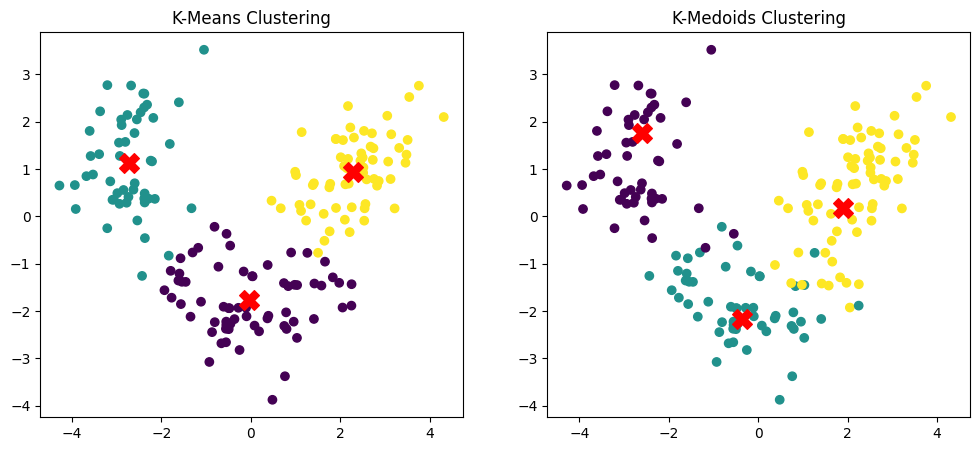

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12,5))

# K-Means plot
plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, cmap='viridis')
plt.scatter(pca.transform(kmeans.cluster_centers_)[:,0], 
            pca.transform(kmeans.cluster_centers_)[:,1], 
            c='red', marker='X', s=200)
plt.title('K-Means Clustering')

# K-Medoids plot
plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmedoids_labels, cmap='viridis')
plt.scatter(pca.transform(kmedoids.cluster_centers_)[:,0], 
            pca.transform(kmedoids.cluster_centers_)[:,1], 
            c='red', marker='X', s=200)
plt.title('K-Medoids Clustering')

plt.show()


PCA was used to reduce the dataset to two dimensions for visualization. The scatter plots show three distinct clusters for both algorithms, with red markers indicating centroids or medoids. The K-Means clusters appear tighter and more evenly distributed, while K-Medoids clusters are slightly less compact. These observations confirm the metric results: K-Means produced better-defined groupings. In general, K-Means is preferable for well-behaved, continuous data, whereas K-Medoids is advantageous for noisy or irregular datasets.